In [2]:
from HMM_Functions import *
from matplotlib import cm, pyplot as plt
import seaborn
from matplotlib.dates import YearLocator, MonthLocator, DayLocator
import pandas as pd
import numpy as np
from datetime import datetime


In [3]:
file_name = 'biib.us.txt'
df_biib_stock = get_stock_data(file_name)
df_biib_stock = df_biib_stock[-30:]
df_biib_stock = df_biib_stock.reset_index()
df_biib_stock

,index,Close,Date,High,Low,Open,OpenInt,Volume
0,6556,316.17,2017-10-02,317.13,313.12,315.19,0,1669719
1,6557,317.39,2017-10-03,317.8,313.91,317.11,0,850783
2,6558,314.92,2017-10-04,316.55,306,313.57,0,1067637
3,6559,326.74,2017-10-05,330.98,320.276,320.72,0,2159738
4,6560,327.48,2017-10-06,328.5,324.6,325.21,0,1023638
5,6561,329.01,2017-10-09,332.24,326.325,327.46,0,902443
6,6562,332.81,2017-10-10,332.87,328.25,328.55,0,1001224
7,6563,333.19,2017-10-11,333.33,329.27,332.12,0,937951
8,6564,333.31,2017-10-12,334.32,330.04,332.93,0,1131332
9,6565,337.64,2017-10-13,338.94,332.07,333.26,0,1358790


In [11]:
# Get data and initialize
df_emission = get_emission(df_biib_stock)
emission = df_emission['Emission'][1:]
emission_list = emission.tolist()

tpm = [[0.3, 0.3, 0.2, 0.1, 0.05, 0.05],
       [0.25, 0.3, 0.25, 0.1, 0.05, 0.05],
       [0.1, 0.1, 0.3, 0.2, 0.2, 0.1],
       [0.1, 0.1, 0.2, 0.3, 0.2, 0.1],
       [0.05, 0.05, 0.1, 0.25, 0.3, 0.25],
       [0.05, 0.05, 0.1, 0.2, 0.3, 0.3]]

#tpm = create_TPM(6)

epm = create_EPM(6, 2)
NUM_STATES = 6

pi = [.2, .1, .1, .2, .1, .1]

In [12]:
tpm, epm = baum_welch(tpm, epm, pi, emission_list)

In [13]:
tpm

array([[0.30814741, 0.29565002, 0.19843809, 0.09691953, 0.05071436,
        0.05013058],
       [0.26370214, 0.29333796, 0.24530599, 0.0974872 , 0.05019782,
        0.04996889],
       [0.10147508, 0.09632492, 0.29838559, 0.19520502, 0.20626485,
        0.10234454],
       [0.09803027, 0.0961039 , 0.20124001, 0.29155506, 0.20964026,
        0.1034305 ],
       [0.04699877, 0.04633792, 0.09897698, 0.23817994, 0.31251361,
        0.25699278],
       [0.04665168, 0.04624204, 0.09874671, 0.18962883, 0.31158445,
        0.3071463 ]])

In [14]:
epm

[[0.7308421894383074, 0.26915781056169247],
 [0.6023713943266696, 0.3976286056733304],
 [0.5148018795282779, 0.4851981204717219],
 [0.57768860591595, 0.4223113940840505],
 [0.4556740198726306, 0.5443259801273691],
 [0.48190737253175325, 0.5180926274682466]]

In [15]:
states_path = viterbi(tpm, epm, pi, emission_list)

In [16]:
updated_stock_df = add_hidden_states_to_df(df_emission, states_path)
updated_stock_df

,Date,Close,Yesterday Close,Close Value Difference,Emission,Hidden_State
0,2017-10-02,316.17,NaN,NaN,NaN,starting state
1,2017-10-03,317.39,316.17,1.22,Increasing,0
2,2017-10-04,314.92,317.39,-2.47,Decreasing,0
3,2017-10-05,326.74,314.92,11.82,Increasing,0
4,2017-10-06,327.48,326.74,0.74,Increasing,1
5,2017-10-09,329.01,327.48,1.53,Increasing,0
6,2017-10-10,332.81,329.01,3.80,Increasing,0
7,2017-10-11,333.19,332.81,0.38,Increasing,0
8,2017-10-12,333.31,333.19,0.12,Increasing,0
9,2017-10-13,337.64,333.31,4.33,Increasing,0


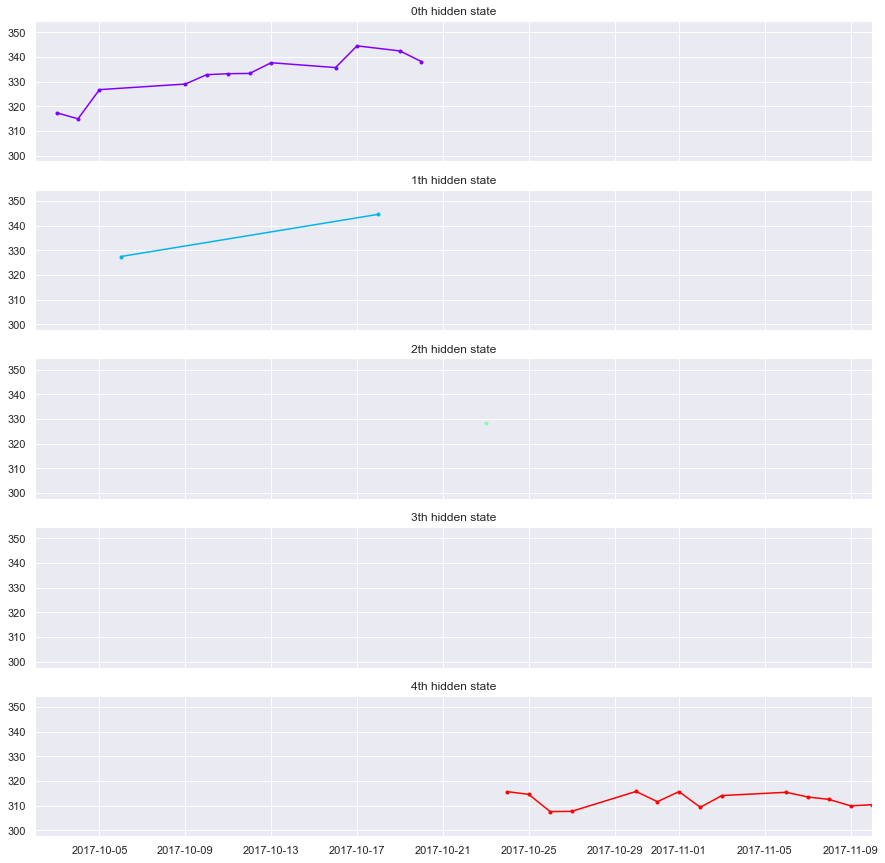

In [17]:
graph_hidden_states(updated_stock_df, states_path)